# NBA Archetypes (Part 2)

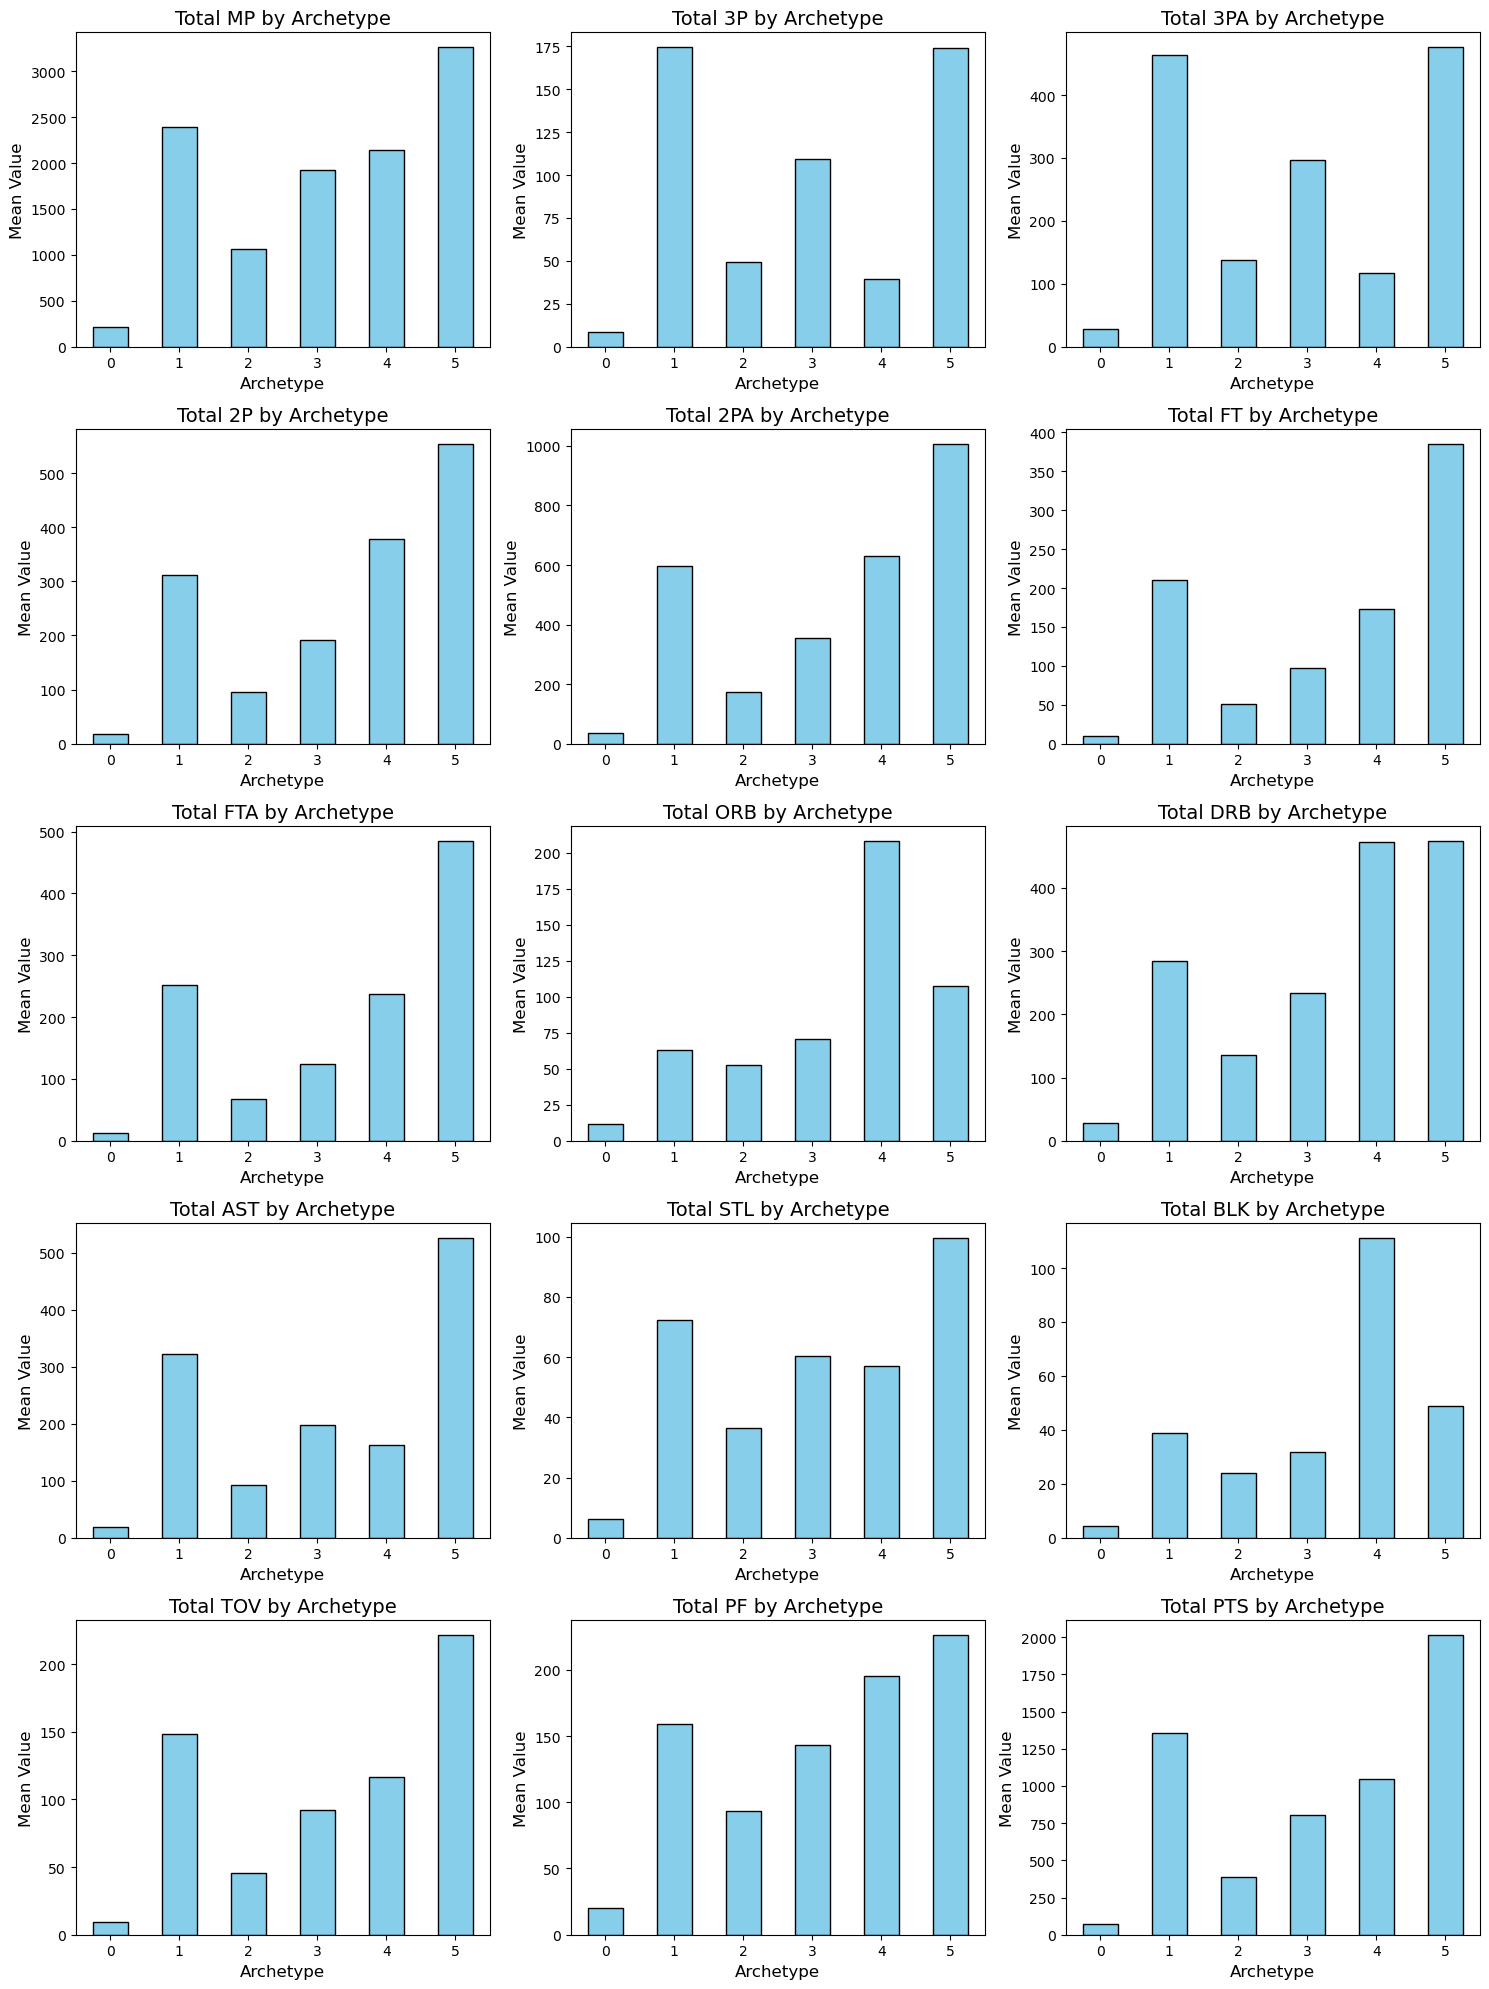

## Initialization

In [1]:
# Data manipulation
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
# Load data function
def load_data(file_name, local_path, server_path):
    try:
        data = pd.read_csv(local_path + file_name)
        print(f"'{file_name}' file successfully read from the local path.")

    except FileNotFoundError:
        try:
            data = pd.read_csv(server_path + file_name)
            print(f"'{file_name}' file successfully read from the server path.")

        except FileNotFoundError:
            print(f"'{file_name}' file not found. Please check the file paths.")
            data = None
            
    return data

file_names = ['cluster_0.csv', 'cluster_1.csv', 'cluster_2.csv', 'cluster_3.csv', 'cluster_4.csv', 'cluster_5.csv']
local_path =  '/Users/benjaminstephen/Documents/TripleTen/Code_Pudding/NBA-Archetypes/datasets/'
server_path = '/datasets/'

cluster_0 = load_data(file_names[0], local_path, server_path)
cluster_1 = load_data(file_names[1], local_path, server_path) 
cluster_2 = load_data(file_names[2], local_path, server_path)
cluster_3 = load_data(file_names[3], local_path, server_path)   
cluster_4 = load_data(file_names[4], local_path, server_path) 
cluster_5 = load_data(file_names[5], local_path, server_path) 

'cluster_0.csv' file successfully read from the local path.
'cluster_1.csv' file successfully read from the local path.
'cluster_2.csv' file successfully read from the local path.
'cluster_3.csv' file successfully read from the local path.
'cluster_4.csv' file successfully read from the local path.
'cluster_5.csv' file successfully read from the local path.


## Data Preprocessing

In [3]:
# Analyze function
def analyze(data):
    # Display the DataFrame
    display(data)

    # Print DataFrame Info
    print("DATAFRAME INFO:")
    data.info()
    print()

    # Calculate Percentage of Null Values
    print("PERCENTAGE OF NULL VALUES:")
    print((data.isnull().sum()/len(data)) * 100)
    print()

    # Calculate Number of Duplicated Rows
    print("NUMBER OF DUPLICATED ROWS:", data.duplicated().sum())

In [4]:
def feature_engineer(cluster):
    cluster['3P%'] = (cluster['Total 3P'] / cluster['Total 3PA']) * 100
    cluster['2P%'] = (cluster['Total 2P'] / cluster['Total 2PA']) * 100
    cluster['FT%'] = (cluster['Total FT'] / cluster['Total FTA']) * 100

    return cluster

In [5]:
def get_sorted_skills_for_cluster(cluster):
    # List of features to analyze (excluding 'Player Name' and 'Archetype')
    features_to_consider = ['Total MP', 'Total 3P', 'Total 3PA', 'Total 2P', 'Total 2PA', 
                            'Total FT', 'Total FTA', 'Total ORB', 'Total DRB', 'Total AST', 
                            'Total STL', 'Total BLK', 'Total TOV', 'Total PF', 'Total PTS',
                            '3P%', '2P%', 'FT%']


    # Sort the stats in descending order based on their mean values
    sorted_stats = cluster[features_to_consider].mean().sort_values(ascending=False)

    # Return the sorted stats for the chosen cluster
    return sorted_stats

In [6]:
def plot_best_skills_for_cluster(sorted_stats):

    # Create a horizontal bar plot
    plt.figure(figsize=(20, 5))
    sns.barplot(x=sorted_stats.values, y=sorted_stats.index, palette='viridis')
    plt.title(f"Best Skills")
    plt.xlabel('Average Value')
    plt.ylabel('Stats')
    plt.show()

## Cluster 0 [Loser (Has the worst stats)]

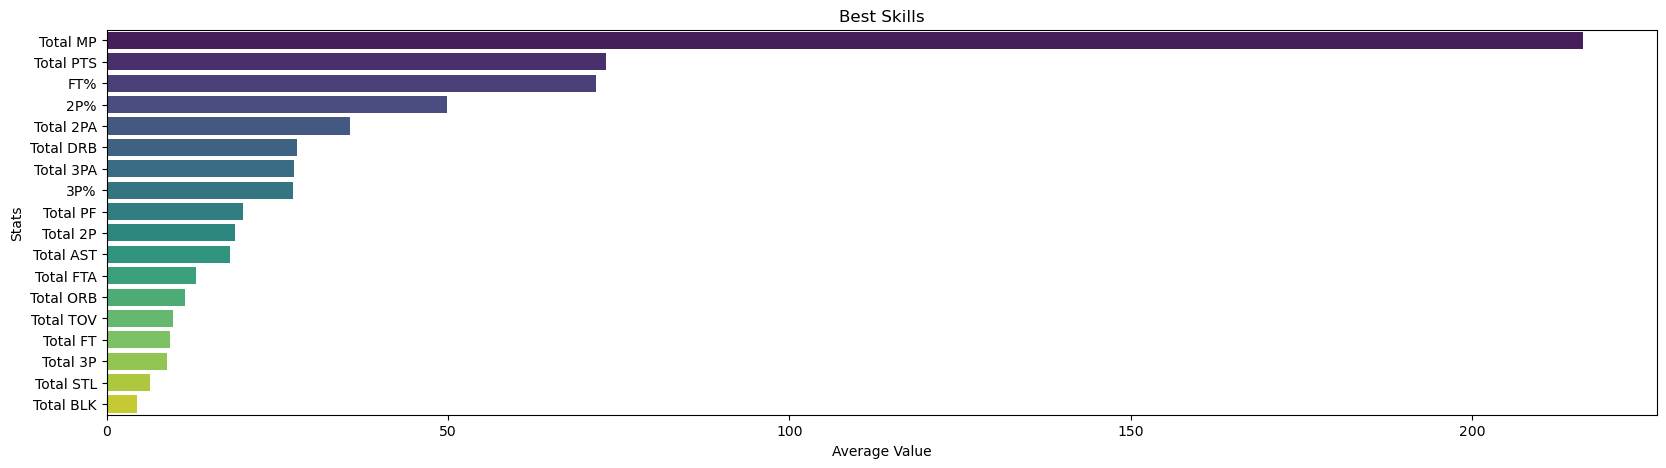

Total MP     216.259735
Total PTS     73.216814
FT%           71.731517
2P%           49.840289
Total 2PA     35.673894
Total DRB     27.895575
Total 3PA     27.414602
3P%           27.245180
Total PF      19.949558
Total 2P      18.755310
Total AST     18.069469
Total FTA     13.085841
Total ORB     11.546018
Total TOV      9.732301
Total FT       9.332301
Total 3P       8.830088
Total STL      6.297345
Total BLK      4.388938
dtype: float64

In [7]:
feature_engineer(cluster_0)
sorted_stats_0 = get_sorted_skills_for_cluster(cluster_0)
plot_best_skills_for_cluster(sorted_stats_0)
display(sorted_stats_0)

## Cluster 1 (Sneaky Sniper, makes a lot of 3 points and likes to steal)

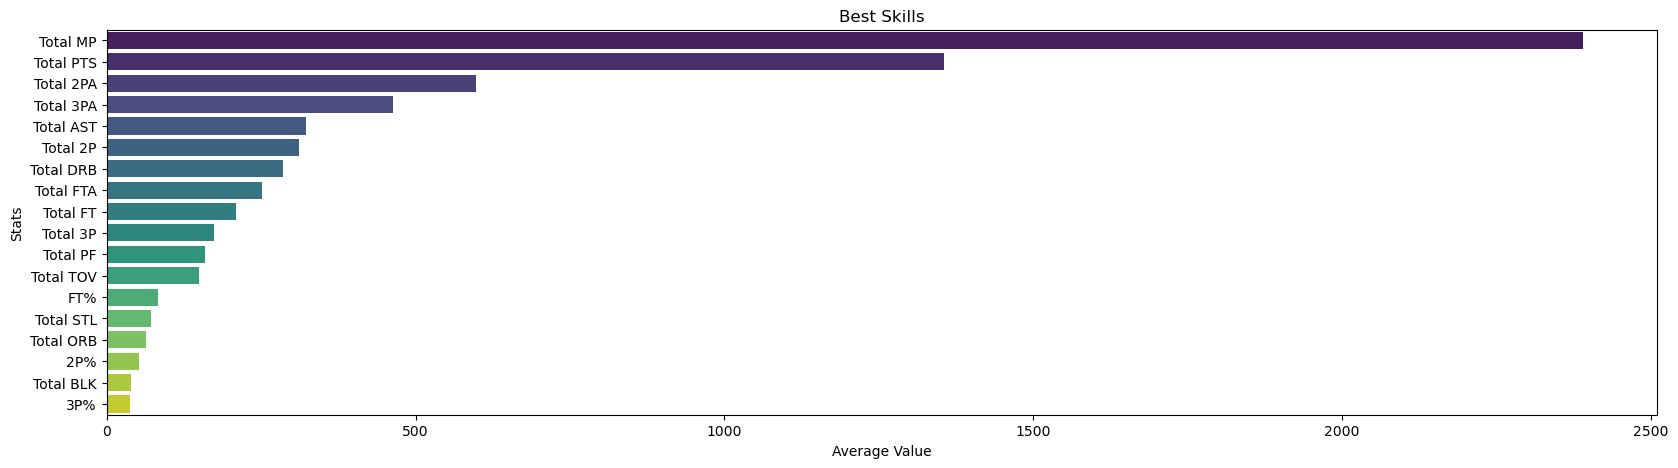

Total MP     2389.454098
Total PTS    1356.032787
Total 2PA     597.345902
Total 3PA     463.377049
Total AST     321.947541
Total 2P      311.104918
Total DRB     285.050820
Total FTA     251.519672
Total FT      209.847541
Total 3P      174.380328
Total PF      159.062295
Total TOV     148.677049
FT%            83.276253
Total STL      72.298361
Total ORB      63.037705
2P%            51.884484
Total BLK      38.939344
3P%            37.440057
dtype: float64

In [8]:
feature_engineer(cluster_1)
sorted_stats_1 = get_sorted_skills_for_cluster(cluster_1)
plot_best_skills_for_cluster(sorted_stats_1)
display(sorted_stats_1)

## Cluster 2 (The Sub, used for when no one else can play)

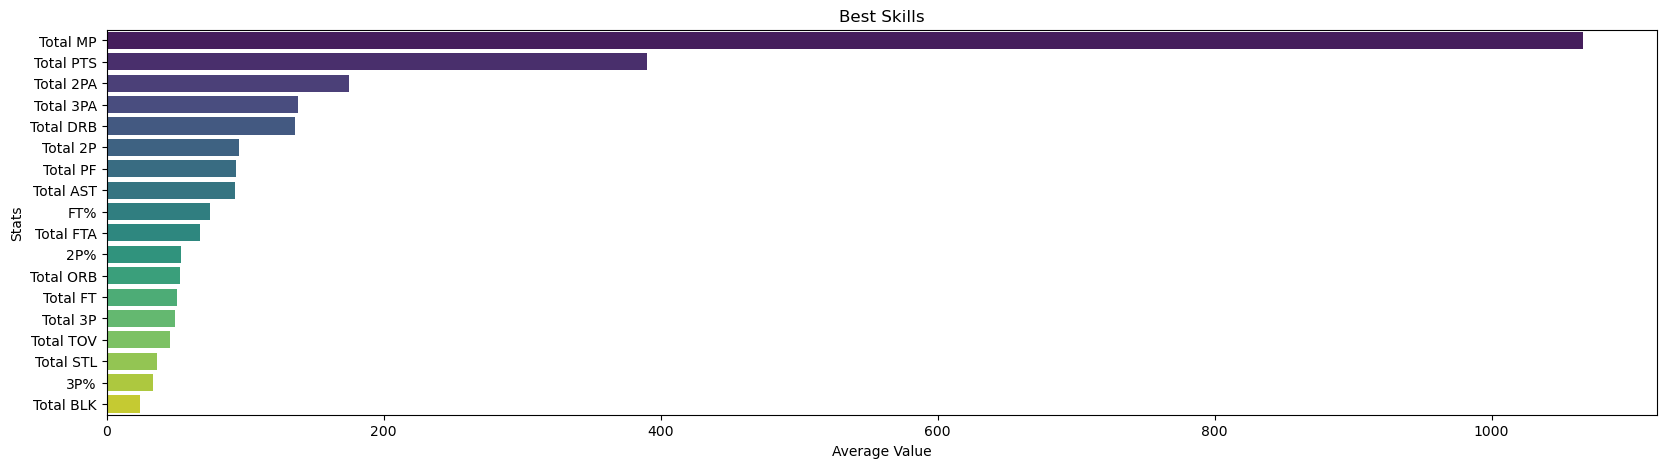

Total MP     1065.945588
Total PTS     389.830882
Total 2PA     174.958824
Total 3PA     137.987500
Total DRB     136.164706
Total 2P       95.257353
Total PF       93.421324
Total AST      93.019118
FT%            74.950218
Total FTA      67.689706
2P%            53.869936
Total ORB      52.675735
Total FT       50.447059
Total 3P       49.591176
Total TOV      45.733824
Total STL      36.366912
3P%            33.360505
Total BLK      23.992647
dtype: float64

In [9]:
feature_engineer(cluster_2)
sorted_stats_2 = get_sorted_skills_for_cluster(cluster_2)
plot_best_skills_for_cluster(sorted_stats_2)
display(sorted_stats_2)

## Cluster 3 (Helping hand, has avg stats, but better than 0, likes to provide defensive rebounds and assists whenever they can)

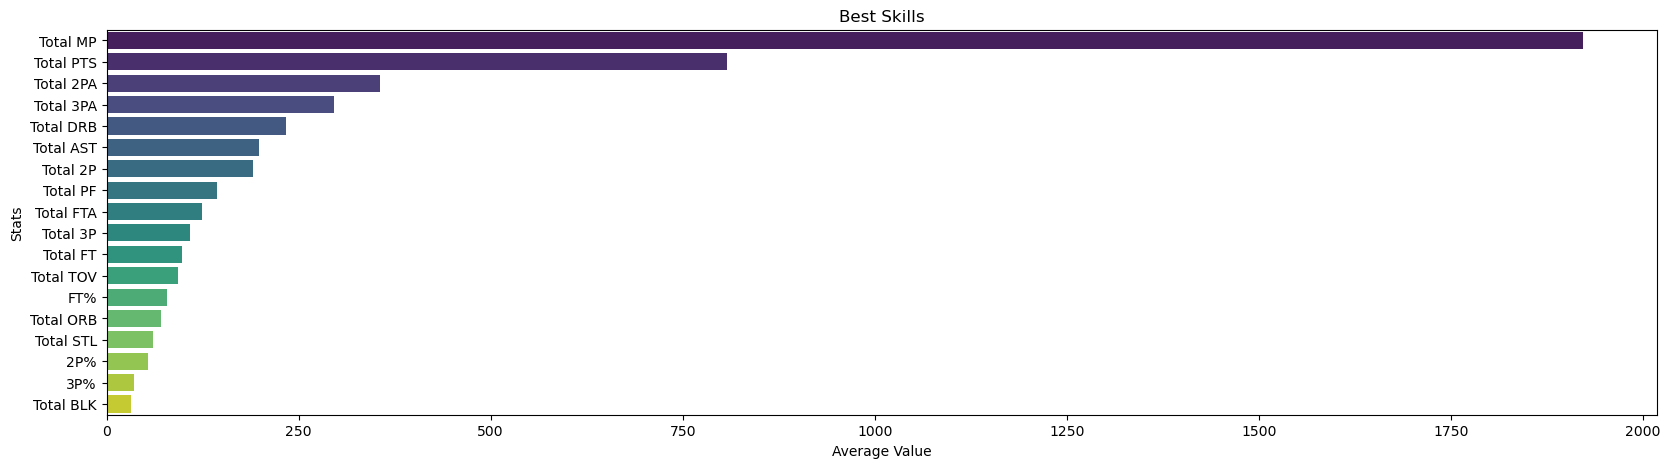

Total MP     1921.815957
Total PTS     807.288298
Total 2PA     356.503191
Total 3PA     296.586170
Total DRB     233.270213
Total AST     198.300000
Total 2P      190.748936
Total PF      143.552128
Total FTA     124.548936
Total 3P      109.040426
Total FT       97.600000
Total TOV      92.491489
FT%            78.231265
Total ORB      70.510638
Total STL      60.224468
2P%            53.912787
3P%            35.868820
Total BLK      31.655319
dtype: float64

In [10]:
feature_engineer(cluster_3)
sorted_stats_3 = get_sorted_skills_for_cluster(cluster_3)
plot_best_skills_for_cluster(sorted_stats_3)
display(sorted_stats_3)

## Cluster 4 (Rebounder)
- has most offensive and defensive rebounds and blcoks out of any group

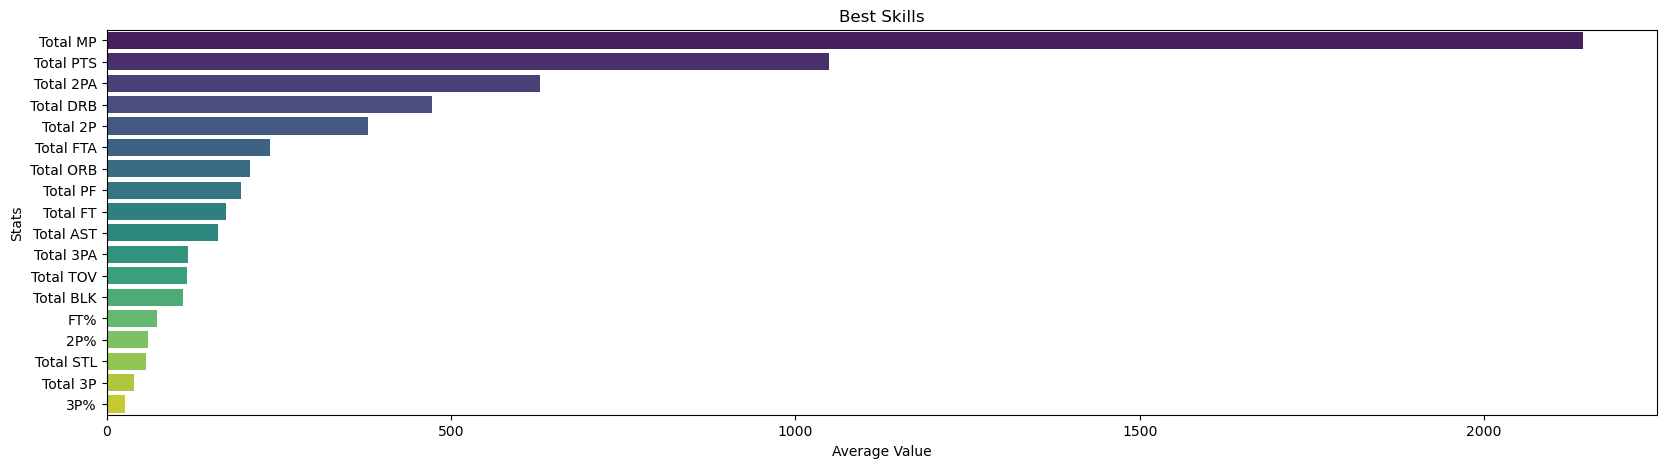

Total MP     2143.327586
Total PTS    1048.217241
Total 2PA     629.775862
Total DRB     472.824138
Total 2P      378.951724
Total FTA     237.600000
Total ORB     207.944828
Total PF      195.327586
Total FT      172.941379
Total AST     162.186207
Total 3PA     117.593103
Total TOV     116.368966
Total BLK     111.017241
FT%            72.699319
2P%            60.666563
Total STL      57.200000
Total 3P       39.362069
3P%            27.152706
dtype: float64

In [11]:
feature_engineer(cluster_4)
sorted_stats_4 = get_sorted_skills_for_cluster(cluster_4)
plot_best_skills_for_cluster(sorted_stats_4)
display(sorted_stats_4)

## Cluster 5 (MVP good at everything)

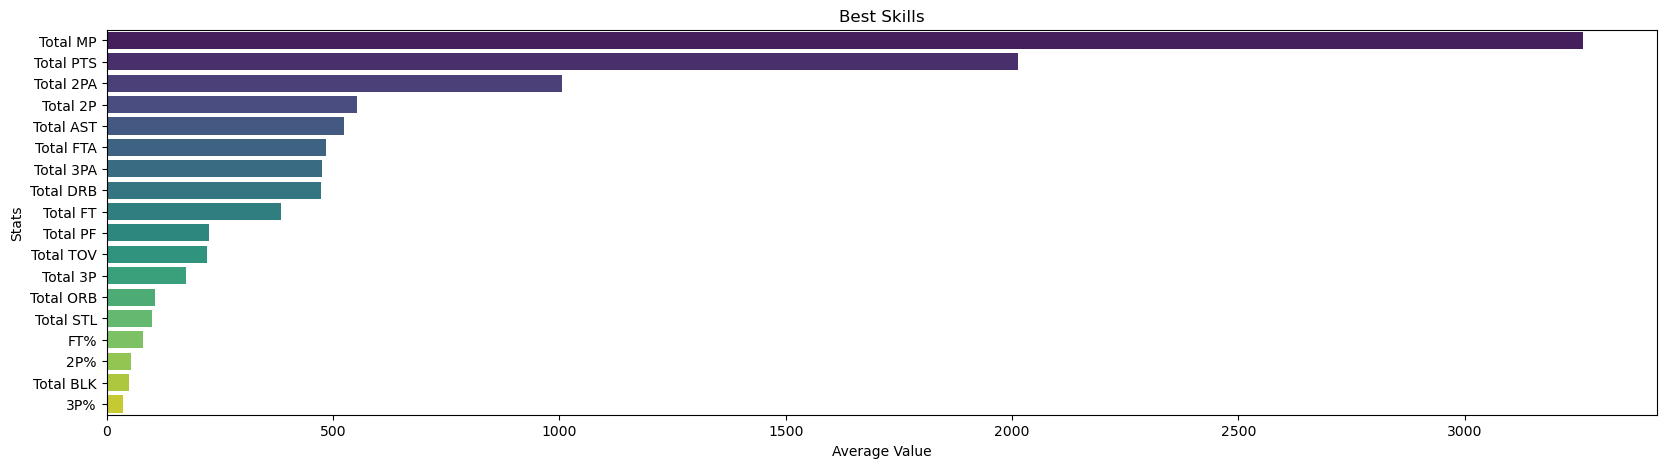

Total MP     3260.903846
Total PTS    2012.311538
Total 2PA    1005.215385
Total 2P      553.169231
Total AST     525.369231
Total FTA     484.365385
Total 3PA     475.834615
Total DRB     473.765385
Total FT      384.596154
Total PF      226.034615
Total TOV     221.303846
Total 3P      174.200000
Total ORB     107.711538
Total STL      99.484615
FT%            79.690193
2P%            54.743914
Total BLK      48.688462
3P%            36.262344
dtype: float64

In [12]:
feature_engineer(cluster_5)
sorted_stats_5 = get_sorted_skills_for_cluster(cluster_5)
plot_best_skills_for_cluster(sorted_stats_5)
display(sorted_stats_5)

In [13]:
sorted_stats = get_sorted_skills_for_cluster(cluster_5)
display(sorted_stats.head())

Total MP     3260.903846
Total PTS    2012.311538
Total 2PA    1005.215385
Total 2P      553.169231
Total AST     525.369231
dtype: float64

In [14]:
import pandas as pd

def get_average_stats_for_cluster(cluster_df):
    """
    Calculate the average for each stat in the cluster.
    
    Args:
    - cluster_df (DataFrame): DataFrame for a specific cluster.
    
    Returns:
    - Series with average stats for the cluster.
    """
    # List of features to calculate the average (excluding 'Player Name' and 'Archetype')
    stats_columns = ['Total MP', 'Total 3P', 'Total 3PA', 'Total 2P', 'Total 2PA', 
                            'Total FT', 'Total FTA', 'Total ORB', 'Total DRB', 'Total AST', 
                            'Total STL', 'Total BLK', 'Total TOV', 'Total PF', 'Total PTS',
                            '3P%', '2P%', 'FT%']
    
    # Calculate the mean of each stat and return it as a Series
    return cluster_df[stats_columns].mean()

def compile_cluster_averages(clusters):
    """
    Compile the average stats of each cluster into a single DataFrame.
    
    Args:
    - clusters (list of DataFrame): List of cluster DataFrames.
    
    Returns:
    - DataFrame with the averages of each cluster.
    """
    # List to store average stats for each cluster
    cluster_averages = []
    
    # Loop through each cluster and calculate the average stats
    for i, cluster in enumerate(clusters):
        avg_stats = get_average_stats_for_cluster(cluster)
        avg_stats.name = f"Cluster {i}"  # Name the series for the cluster
        cluster_averages.append(avg_stats)
    
    # Compile all the averages into one DataFrame
    return pd.DataFrame(cluster_averages)

# Assuming 'clusters' is a list of DataFrames (cluster_0, cluster_1, etc.)
clusters = [cluster_0, cluster_1, cluster_2, cluster_3, cluster_4, cluster_5]

# Compile the averages into one DataFrame
cluster_comparison_df = compile_cluster_averages(clusters)

# Display the resulting DataFrame
display(cluster_comparison_df)


,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS,3P%,2P%,FT%
Cluster 0,216.259735,8.830088,27.414602,18.755310,35.673894,9.332301,13.085841,11.546018,27.895575,18.069469,6.297345,4.388938,9.732301,19.949558,73.216814,27.245180,49.840289,71.731517
Cluster 1,2389.454098,174.380328,463.377049,311.104918,597.345902,209.847541,251.519672,63.037705,285.050820,321.947541,72.298361,38.939344,148.677049,159.062295,1356.032787,37.440057,51.884484,83.276253
Cluster 2,1065.945588,49.591176,137.987500,95.257353,174.958824,50.447059,67.689706,52.675735,136.164706,93.019118,36.366912,23.992647,45.733824,93.421324,389.830882,33.360505,53.869936,74.950218
Cluster 3,1921.815957,109.040426,296.586170,190.748936,356.503191,97.600000,124.548936,70.510638,233.270213,198.300000,60.224468,31.655319,92.491489,143.552128,807.288298,35.868820,53.912787,78.231265
Cluster 4,2143.327586,39.362069,117.593103,378.951724,629.775862,172.941379,237.600000,207.944828,472.824138,162.186207,57.200000,111.017241,116.368966,195.327586,1048.217241,27.152706,60.666563,72.699319
Cluster 5,3260.903846,174.200000,475.834615,553.169231,1005.215385,384.596154,484.365385,107.711538,473.765385,525.369231,99.484615,48.688462,221.303846,226.034615,2012.311538,36.262344,54.743914,79.690193
